In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

In [3]:
df_matrix = pd.read_csv('./data/sample_insurance.csv')

In [4]:
df_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 5 columns):
policy_id         49 non-null int64
insurer           49 non-null object
term              49 non-null int64
coverage          49 non-null object
yearly_premium    49 non-null object
dtypes: int64(2), object(3)
memory usage: 2.0+ KB


Note: my policy number above is listed as an int, so when I try to find the optimal policies I will have to ensure they are not strings

In [5]:
df_matrix.head(5)

,policy_id,insurer,term,coverage,yearly_premium
0,1,Insurer 1,10,"$100,000",$98.00
1,2,Insurer 1,10,"$250,000",$143.00
2,3,Insurer 2,10,"$250,000",$228.00
3,4,Insurer 1,10,"$500,000",$205.00
4,5,Insurer 2,10,"$500,000",$370.00


In [6]:
# strip out some of the $ signs and commas in order to perform some calculations
df_matrix.coverage = df_matrix.coverage.str.replace(',', '').str.replace('$', '').astype(float)
df_matrix.yearly_premium = df_matrix.yearly_premium.str.replace(',', '').str.replace('$', '').astype(float)
df_matrix['monthly_premium']=df_matrix.yearly_premium.apply(lambda x: x/12)

In [7]:
df_matrix.head(20)

,policy_id,insurer,term,coverage,yearly_premium,monthly_premium
0,1,Insurer 1,10,100000.0,98.0,8.166667
1,2,Insurer 1,10,250000.0,143.0,11.916667
2,3,Insurer 2,10,250000.0,228.0,19.000000
3,4,Insurer 1,10,500000.0,205.0,17.083333
4,5,Insurer 2,10,500000.0,370.0,30.833333
5,6,Insurer 1,10,750000.0,277.0,23.083333
6,7,Insurer 3,10,750000.0,488.0,40.666667
7,8,Insurer 1,15,100000.0,100.0,8.333333
8,9,Insurer 1,15,250000.0,130.0,10.833333
9,10,Insurer 1,15,500000.0,250.0,20.833333


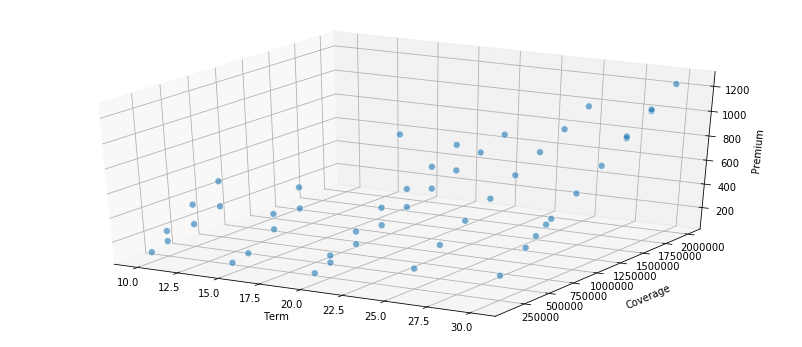

In [8]:
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(111, projection='3d')

xs = df_matrix['term']
ys = df_matrix['coverage']
zs = df_matrix['yearly_premium']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Term',labelpad=10)
ax.set_ylabel('Coverage',labelpad=15)
ax.set_zlabel('Premium')

plt.show()

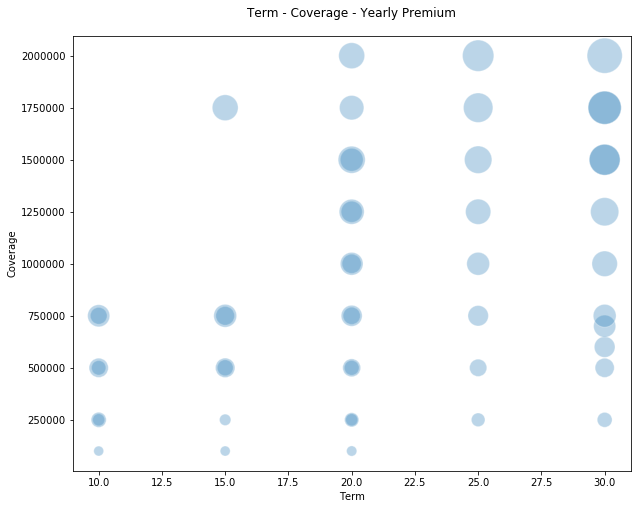

In [9]:
plt.figure(figsize=(10, 8))
plt.scatter(x = df_matrix['term'], 
            y = df_matrix['coverage'], 
            s = df_matrix['yearly_premium'],
            alpha=0.3, 
            edgecolors='w',)

plt.xlabel('Term')
plt.ylabel('Coverage')
plt.title('Term - Coverage - Yearly Premium', y=1.03)

In [10]:
# Let's create a new metric
df_matrix['premium_per_thousand']=(df_matrix.yearly_premium/df_matrix.coverage)*1000

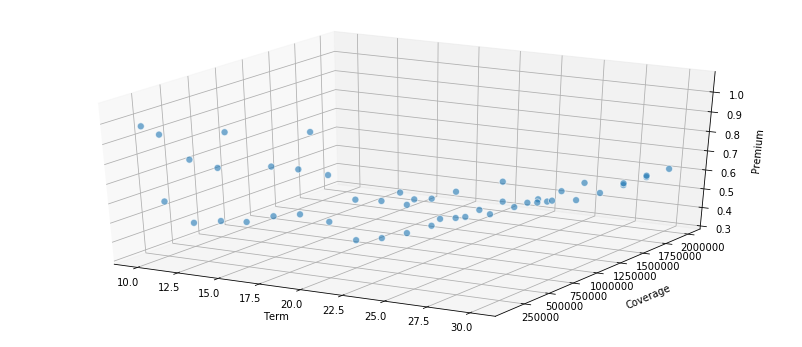

In [11]:
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(111, projection='3d')

xs = df_matrix['term']
ys = df_matrix['coverage']
zs = df_matrix['premium_per_thousand']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Term',labelpad=10)
ax.set_ylabel('Coverage',labelpad=15)
ax.set_zlabel('Premium')

plt.show()

In [12]:
df_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 7 columns):
policy_id               49 non-null int64
insurer                 49 non-null object
term                    49 non-null int64
coverage                49 non-null float64
yearly_premium          49 non-null float64
monthly_premium         49 non-null float64
premium_per_thousand    49 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 2.8+ KB


/Users/Shalu/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


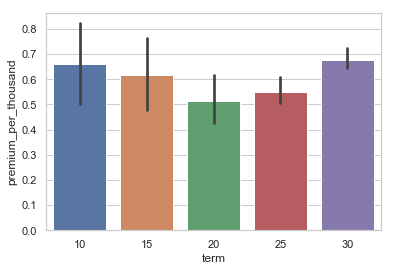

In [13]:
sns.set(style="whitegrid")
ax = sns.barplot(x=df_matrix.term.astype('str'), y=df_matrix.premium_per_thousand)

In [14]:
df_matrix.head(2)

,policy_id,insurer,term,coverage,yearly_premium,monthly_premium,premium_per_thousand
0,1,Insurer 1,10,100000.0,98.0,8.166667,0.980
1,2,Insurer 1,10,250000.0,143.0,11.916667,0.572


In [15]:
df_matrix['cov_x_term']=(df_matrix.coverage * df_matrix.term)

In [16]:
# Create a list of the insurance items, terms, coverage, premiums, etc.
insurance_items = list(df_matrix['policy_id'])
term = dict(zip(insurance_items,df_matrix['term']))
coverage = dict(zip(insurance_items,df_matrix['coverage']))
yearly_premium = dict(zip(insurance_items,df_matrix['yearly_premium']))
cov_x_term = dict(zip(insurance_items,df_matrix['cov_x_term']))

In [17]:
df_matrix.head(15)

,policy_id,insurer,term,coverage,yearly_premium,monthly_premium,premium_per_thousand,cov_x_term
0,1,Insurer 1,10,100000.0,98.0,8.166667,0.980000,1000000.0
1,2,Insurer 1,10,250000.0,143.0,11.916667,0.572000,2500000.0
2,3,Insurer 2,10,250000.0,228.0,19.000000,0.912000,2500000.0
3,4,Insurer 1,10,500000.0,205.0,17.083333,0.410000,5000000.0
4,5,Insurer 2,10,500000.0,370.0,30.833333,0.740000,5000000.0
5,6,Insurer 1,10,750000.0,277.0,23.083333,0.369333,7500000.0
6,7,Insurer 3,10,750000.0,488.0,40.666667,0.650667,7500000.0
7,8,Insurer 1,15,100000.0,100.0,8.333333,1.000000,1500000.0
8,9,Insurer 1,15,250000.0,130.0,10.833333,0.520000,3750000.0
9,10,Insurer 1,15,500000.0,250.0,20.833333,0.500000,7500000.0


### Let's Try To Solve With Linear/Integer Programming

In [18]:
from pulp import *

In [19]:
min_avg_term = 30
min_tot_cov = 1500000

In [20]:
prob = LpProblem("Insurance Problem",LpMinimize)
insurance_vars = LpVariable.dicts("Life",insurance_items,0,cat='Integer')

In [21]:
#Next, we start building the LP problem by adding the main objective function. Note the use of thelpSum method.
prob += lpSum([yearly_premium[i]*insurance_vars[i] for i in insurance_items])

#Minimum Total Coverage
prob += lpSum([coverage[f] * insurance_vars[f] for f in insurance_items]) >= min_tot_cov, "MinimumTotalCoverage"

#Minimum Average Term
prob += lpSum([cov_x_term[f] * insurance_vars[f] for f in insurance_items]) >= min_avg_term*(lpSum([coverage[f] * insurance_vars[f] for f in insurance_items])), "MinimumAvgDuration"

prob.solve()

print("Status:", LpStatus[prob.status])

Status: Optimal


In [22]:
#Now we have a dictionary that has a series of variables and an optimal set of weights for example
print (prob.variables()[3].varValue)

0.0


In [23]:
#Let's grab all the weights and put them into a dataframe so we can easily take a look 
weights_dict = {} 
pricing_dict = {}

weights_dict={}
for v in prob.variables():
    weights_dict.update({v.name[5:]:v.varValue})

In [24]:
weights_df = pd.DataFrame(weights_dict,index=[0]).transpose()
weights_df.reset_index(inplace=True)
weights_df.rename(columns={'index':'policy_id',0:'weights'},inplace=True)

In [25]:
#formatting these fields so we can compare them to the original matrix
weights_df.policy_id = weights_df.policy_id.apply(lambda l: float(l))
weights_df.weights = weights_df.weights.apply(lambda l: float(l))

In [26]:
weights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
policy_id    49 non-null float64
weights      49 non-null float64
dtypes: float64(2)
memory usage: 864.0 bytes


In [27]:
weights_df[weights_df.weights>0.0]

,policy_id,weights
39,45.0,1.0


#### We only have 1 policy that has a weight equal to 1 for a minimum average term of 30 years and $1.5 Million of Coverage. Appears that for these constraints, this policy is optimally priced.

In [28]:
df_scenario = df_matrix.merge(weights_df,how='left',on='policy_id')

In [29]:
df_scenario.tail()

,policy_id,insurer,term,coverage,yearly_premium,monthly_premium,premium_per_thousand,cov_x_term,weights
44,45,Insurer 1,30,1500000.0,941.0,78.416667,0.627333,45000000.0,1.0
45,46,Insurer 2,30,1500000.0,955.0,79.583333,0.636667,45000000.0,0.0
46,47,Insurer 1,30,1750000.0,1087.0,90.583333,0.621143,52500000.0,0.0
47,48,Insurer 2,30,1750000.0,1100.0,91.666667,0.628571,52500000.0,0.0
48,49,Insurer 2,30,2000000.0,1234.0,102.833333,0.617000,60000000.0,0.0


In [30]:
df_scenario[df_scenario.weights>0.0]

,policy_id,insurer,term,coverage,yearly_premium,monthly_premium,premium_per_thousand,cov_x_term,weights
44,45,Insurer 1,30,1500000.0,941.0,78.416667,0.627333,45000000.0,1.0


#### Perhaps let's look at a few different scenarios of coverage and term, it's highly likely that the common policy terms 10,20,30 are likely optimally priced.  So perhaps looking at some potential terms in the middle may yield some fruit from using our integer programming technique/tool.

In [31]:
# coverage
min_cov_array = [750000,1000000,1250000,1500000,1750000,2000000]
min_term_array = [15,20,23,25,27]

In [32]:
num_scenarios = len(min_cov_array)*len(min_term_array)

weights_dict = {} 
pricing_dict = {}

df_scenario = pd.DataFrame()
df_final_scenario_policy_weights = pd.DataFrame() 
df_final_summary = pd.DataFrame()

#min_avg_term = 25.0
for min_avg_term in min_term_array:
    #Can break below into sub_function
    for min_tot_cov in min_cov_array:
        #keep data on each run remember scenario for min_avg_term
        
        prob = LpProblem("Insurance Problem",LpMinimize)
        insurance_vars = LpVariable.dicts("Life",insurance_items,0,cat='Integer')

        prob += lpSum([yearly_premium[i]*insurance_vars[i] for i in insurance_items])
        prob += lpSum([coverage[f] * insurance_vars[f] for f in insurance_items]) >= min_tot_cov, "MinimumTotalCoverage"
        prob += lpSum([cov_x_term[f] * insurance_vars[f] for f in insurance_items]) >= min_avg_term*(lpSum([coverage[f] * insurance_vars[f] for f in insurance_items])), "MinimumAvgDuration"
        prob.solve()

        weights_dict[f'{min_avg_term}_{min_tot_cov:}']={}
        for v in prob.variables():
            weights_dict[f'{min_avg_term}_{min_tot_cov:}'].update({v.name[5:]:v.varValue})            

    #write all this into dataframe
    weights_df = pd.DataFrame(weights_dict)
    weights_df.reset_index(inplace=True)
    weights_df.rename(columns={'index':'policy_id'},inplace=True)
    
    weights_df['policy_id'] = weights_df['policy_id'].astype('int64')

    df_scenario = df_matrix.merge(weights_df,how='left',on='policy_id')
    

In [33]:
num_scenarios

30

In [34]:
weights_df.shape

(49, 31)

In [35]:
df_scenario.head(5)

,policy_id,insurer,term,coverage,yearly_premium,monthly_premium,premium_per_thousand,cov_x_term,15_750000,15_1000000,...,25_1250000,25_1500000,25_1750000,25_2000000,27_750000,27_1000000,27_1250000,27_1500000,27_1750000,27_2000000
0,1,Insurer 1,10,100000.0,98.0,8.166667,0.980,1000000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Insurer 1,10,250000.0,143.0,11.916667,0.572,2500000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Insurer 2,10,250000.0,228.0,19.000000,0.912,2500000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Insurer 1,10,500000.0,205.0,17.083333,0.410,5000000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Insurer 2,10,500000.0,370.0,30.833333,0.740,5000000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# for a more convenient view let's only keep the policies that have weights > 0
df_scenario.shape

(49, 38)

In [37]:
## for illustrative purposes I'm copying this over to a separate dataframe, with large datasets this is not recommended. 
df_weighted = df_scenario[(df_scenario.iloc[:,-num_scenarios:]!=0).any(axis=1)]
df_weighted = df_weighted.copy()

In [38]:
df_weighted.shape

(19, 38)

In [39]:
df_weighted.head(5)

,policy_id,insurer,term,coverage,yearly_premium,monthly_premium,premium_per_thousand,cov_x_term,15_750000,15_1000000,...,25_1250000,25_1500000,25_1750000,25_2000000,27_750000,27_1000000,27_1250000,27_1500000,27_1750000,27_2000000
8,9,Insurer 1,15,250000.0,130.0,10.833333,0.520000,3750000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
17,18,Insurer 1,20,500000.0,215.0,17.916667,0.430000,10000000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,Insurer 1,20,750000.0,292.0,24.333333,0.389333,15000000.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,22,Insurer 1,20,1000000.0,365.0,30.416667,0.365000,20000000.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,24,Insurer 1,20,1250000.0,442.0,36.833333,0.353600,25000000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
#Quick view of our policies shows that this may be working.
df_weighted.iloc[:,-num_scenarios:].astype(bool).sum()

15_750000     1
15_1000000    1
15_1250000    1
15_1500000    1
15_1750000    1
15_2000000    1
20_750000     1
20_1000000    1
20_1250000    1
20_1500000    1
20_1750000    1
20_2000000    1
23_750000     1
23_1000000    1
23_1250000    2
23_1500000    2
23_1750000    2
23_2000000    2
25_750000     1
25_1000000    1
25_1250000    1
25_1500000    1
25_1750000    1
25_2000000    1
27_750000     1
27_1000000    1
27_1250000    2
27_1500000    2
27_1750000    2
27_2000000    2
dtype: int64

In [41]:
aggregate = {} 
for i in df_weighted.iloc[:,-num_scenarios:].columns:
    aggregate[i]={
                'policy_count':df_weighted[i].astype(bool).sum(),
                'yearly_premium':np.dot(df_weighted.yearly_premium,df_weighted[i]),
                'wa_term':np.dot(df_weighted['cov_x_term'],df_weighted[i])/(np.dot(df_weighted.coverage,df_weighted[i])),
                'total_coverage':np.dot(df_weighted.coverage,df_weighted[i])}

In [42]:
#count number of unique policies
df_portfolio_stats = pd.DataFrame(aggregate).transpose()
df_portfolio_stats.index.rename('scenario',inplace=True)

In [43]:
df_portfolio_stats.reset_index(inplace=True)

In [44]:
df_portfolio_stats['min_avg_term']=df_portfolio_stats.scenario.str.split("_",expand=True)[0]
df_portfolio_stats['min_tot_cov']=df_portfolio_stats.scenario.str.split("_",expand=True)[1]
df_portfolio_stats = df_portfolio_stats[['scenario', 'min_avg_term','min_tot_cov','policy_count', 'yearly_premium', 'wa_term','total_coverage']]

In [45]:
df_portfolio_stats['premium_per_thousand']=(df_portfolio_stats.yearly_premium/df_portfolio_stats.total_coverage)*1000

In [46]:
df_portfolio_stats

,scenario,min_avg_term,min_tot_cov,policy_count,yearly_premium,wa_term,total_coverage,premium_per_thousand
0,15_750000,15,750000,1.0,292.0,20.000000,750000.0,0.389333
1,15_1000000,15,1000000,1.0,365.0,20.000000,1000000.0,0.365000
2,15_1250000,15,1250000,1.0,442.0,20.000000,1250000.0,0.353600
3,15_1500000,15,1500000,1.0,518.0,20.000000,1500000.0,0.345333
4,15_1750000,15,1750000,1.0,594.0,20.000000,1750000.0,0.339429
5,15_2000000,15,2000000,1.0,671.0,20.000000,2000000.0,0.335500
6,20_750000,20,750000,1.0,292.0,20.000000,750000.0,0.389333
7,20_1000000,20,1000000,1.0,365.0,20.000000,1000000.0,0.365000
8,20_1250000,20,1250000,1.0,442.0,20.000000,1250000.0,0.353600
9,20_1500000,20,1500000,1.0,518.0,20.000000,1500000.0,0.345333


In [47]:
df_portfolio_stats[(df_portfolio_stats.wa_term>20)].sort_values('premium_per_thousand',ascending=1)

,scenario,min_avg_term,min_tot_cov,policy_count,yearly_premium,wa_term,total_coverage,premium_per_thousand
17,23_2000000,23,2000000,2.0,927.0,23.125000,2000000.0,0.463500
16,23_1750000,23,1750000,2.0,850.0,23.571429,1750000.0,0.485714
15,23_1500000,23,1500000,2.0,731.0,23.333333,1500000.0,0.487333
23,25_2000000,25,2000000,1.0,981.0,25.000000,2000000.0,0.490500
22,25_1750000,25,1750000,1.0,865.0,25.000000,1750000.0,0.494286
21,25_1500000,25,1500000,1.0,750.0,25.000000,1500000.0,0.500000
14,23_1250000,23,1250000,2.0,632.0,23.000000,1250000.0,0.505600
20,25_1250000,25,1250000,1.0,635.0,25.000000,1250000.0,0.508000
13,23_1000000,23,1000000,1.0,520.0,25.000000,1000000.0,0.520000
19,25_1000000,25,1000000,1.0,520.0,25.000000,1000000.0,0.520000


In [332]:
#df_matrix['premium_per_thousand']=(df_matrix.yearly_premium/df_matrix.coverage)*1000
#df_matrix['monthly_premium']=df_matrix.yearly_premium.apply(lambda x: x/12)